# Nama: Moammer Kayada Kamal
# Nim: 2209106039
### Posttest 7 KB

#### link: https://www.kaggle.com/datasets/imbikramsaha/drone-bird-classification

In [5]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow_hub as hub

!pip install split-folders
import splitfolders


Import library yang dibutuhkan

In [2]:
!unzip 'archive (7).zip'

Archive:  archive (7).zip
  inflating: drone_or_bird/birds/031e09fe-47cd-4523-b8c9-3591b7bd1f3b.jpg  
  inflating: drone_or_bird/birds/050a45d2-e917-442f-9979-53f9017a8538.jpg  
  inflating: drone_or_bird/birds/0628debe-4429-4d78-b4ad-30f5e951841c.jpg  
  inflating: drone_or_bird/birds/062a9627-2453-443c-99d0-549fe98704b0.jpg  
  inflating: drone_or_bird/birds/0659ed65-704f-450e-84f6-a50354b13243.jpg  
  inflating: drone_or_bird/birds/07da8bc1-df13-4b00-8000-f68825234016.jpeg  
  inflating: drone_or_bird/birds/08863cbd-4a84-46ae-a5f5-920579de1b6f.png  
  inflating: drone_or_bird/birds/0a5b4074-52c7-42d5-8b5e-54b4f93fc129.jpg  
  inflating: drone_or_bird/birds/0adf7f21-6068-47f0-84f0-c464f855a85d.jpg  
  inflating: drone_or_bird/birds/0b4a4fad-0a27-441d-b312-cefde471a722.jpg  
  inflating: drone_or_bird/birds/0bf9f08a-2693-42e6-ab35-9f08f97e4603.jpg  
  inflating: drone_or_bird/birds/0c251caa-9ed5-4f35-bdaa-a632584c8be7.jpg  
  inflating: drone_or_bird/birds/0e4aaa7a-92ab-4d96-9a4f-b73f

Kita ekstrak zipnya

In [6]:
splitfolders.ratio("drone_or_bird", output="dataset_final", seed=1337, ratio=(.8, .1, .1))

Copying files: 330 files [00:00, 4702.57 files/s]


kita bagi datanya menjadi 3 bagian test, train, val

In [8]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory('/content/dataset_final/train', target_size = (224, 224), batch_size = 32, subset = 'training', class_mode = 'binary')
val_data = data_gen.flow_from_directory('/content/dataset_final/val', target_size = (224, 224), batch_size = 32, subset = 'validation', class_mode = 'binary')

Found 209 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


kita melakukan data generator augmentasi

In [9]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

tampilkan isi label

In [10]:
data_directory = pathlib.Path('/content/drone_or_bird')
class_names = [item.name for item in data_directory.glob('*')][:2]
print(class_names)


['drones', 'birds']


tampilkan nama kelas

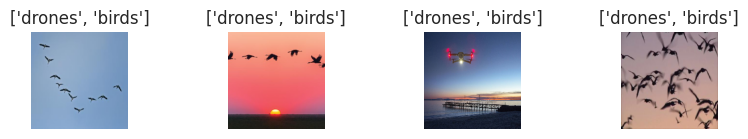

In [41]:
def plot_random_images():
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))

    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names)
        plt.axis('off')
        i += 1
        if i == 5:
            break

    plt.tight_layout()
    plt.show()

plot_random_images()

menampilkan 5 foto random

In [29]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model squential

In [31]:
classifier = model.fit(train_data, batch_size = 32,
                                 epochs = 5,
                                 validation_data = val_data,
                                 verbose = 1)

Epoch 1/5
7/7 [==============================] - 4s 557ms/step - loss: 0.5478 - accuracy: 0.6938 - val_loss: 0.7313 - val_accuracy: 0.6667
Epoch 2/5
7/7 [==============================] - 2s 256ms/step - loss: 0.3506 - accuracy: 0.9043 - val_loss: 0.8124 - val_accuracy: 0.6667
Epoch 3/5
7/7 [==============================] - 2s 250ms/step - loss: 0.2353 - accuracy: 0.8995 - val_loss: 0.8723 - val_accuracy: 0.6667
Epoch 4/5
7/7 [==============================] - 2s 246ms/step - loss: 0.1305 - accuracy: 0.9522 - val_loss: 1.0586 - val_accuracy: 0.6667
Epoch 5/5
7/7 [==============================] - 2s 321ms/step - loss: 0.0713 - accuracy: 0.9856 - val_loss: 1.0528 - val_accuracy: 0.8333


melakukan epochs

In [38]:
model.evaluate(val_data)

1/1 [==============================] - 0s 63ms/step - loss: 1.0528 - accuracy: 0.8333


[1.0528076887130737, 0.8333333134651184]

tampilkan hasil evaluate

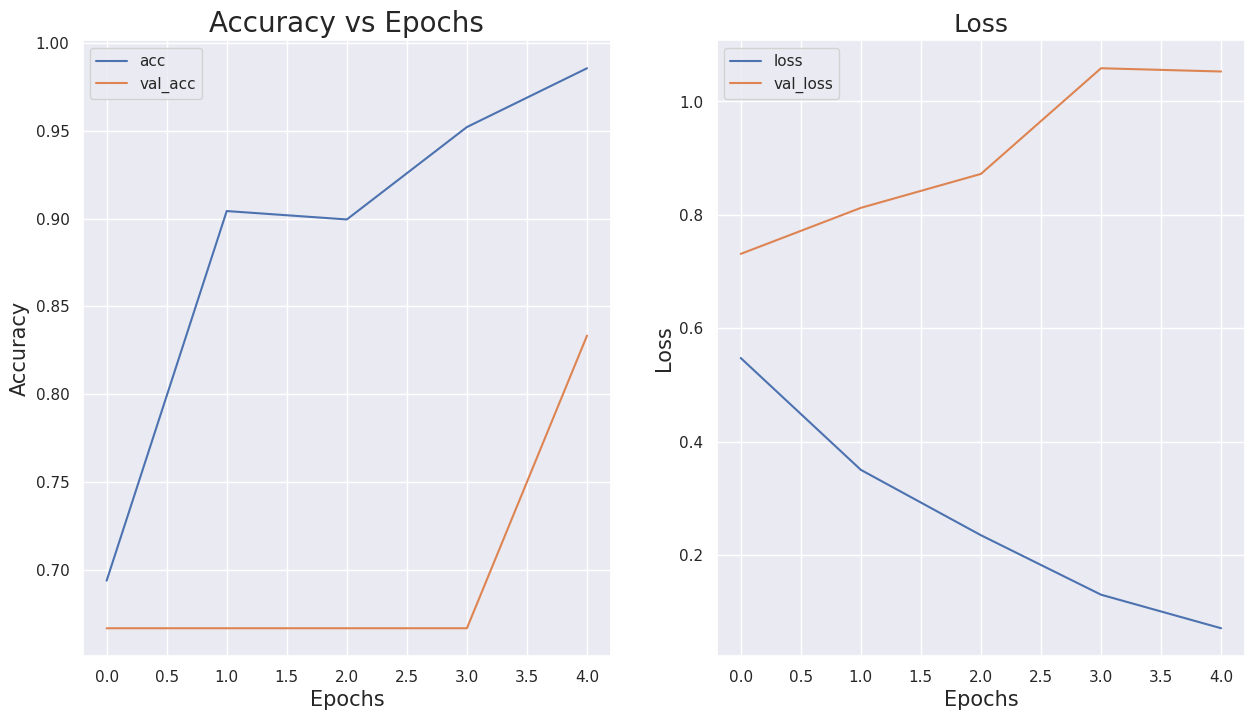

In [40]:
def model_performance_graphs():

    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()

model_performance_graphs()

menampilkan grafik hasil